In [1]:
## get test 
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1CV1__7oQQl14tWzUXkr-_BJwop6Gnhbs' -O test.csv
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tG-uDCYyjwcCZyCYR7typ4lyj5x_GEIP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tG-uDCYyjwcCZyCYR7typ4lyj5x_GEIP" -O testImages.zip && rm -rf /tmp/cookies.txt
!ls -ltr .

--2020-03-05 17:46:17--  https://docs.google.com/uc?export=download&id=1CV1__7oQQl14tWzUXkr-_BJwop6Gnhbs
Resolving docs.google.com (docs.google.com)... 108.177.111.138, 108.177.111.113, 108.177.111.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r5kp47af1063im8rjfuemkg17voucq08/1583430375000/04893697000438917423/*/1CV1__7oQQl14tWzUXkr-_BJwop6Gnhbs?e=download [following]
--2020-03-05 17:46:19--  https://doc-0g-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r5kp47af1063im8rjfuemkg17voucq08/1583430375000/04893697000438917423/*/1CV1__7oQQl14tWzUXkr-_BJwop6Gnhbs?e=download
Resolving doc-0g-5k-docs.googleusercontent.com (doc-0g-5k-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to doc-0g-5k-docs.googleusercontent.com (doc-0g

In [2]:
#unzip test images into its folders
!unzip -o testImages.zip -d ./test/ 
!ls  ./test/*.png | wc -l
!ls -ltr . 

Streaming output truncated to the last 5000 lines.
  inflating: ./test/7f2c4c9f0a.png   
  inflating: ./test/7f313dd1b3.png   
  inflating: ./test/7f3c751f0b.png   
  inflating: ./test/7f4e555ec4.png   
  inflating: ./test/7f5d1edecd.png   
  inflating: ./test/7f5e8c8ffa.png   
  inflating: ./test/7f63f1847b.png   
  inflating: ./test/7f68afc9a5.png   
  inflating: ./test/7f6d845803.png   
  inflating: ./test/7f7037ec27.png   
  inflating: ./test/7f71c1c85d.png   
  inflating: ./test/7f720b6cfe.png   
  inflating: ./test/7f82a2a7c1.png   
  inflating: ./test/7f848d19e2.png   
  inflating: ./test/7f8cb9ca3f.png   
  inflating: ./test/7f8d491509.png   
  inflating: ./test/7f91ad3834.png   
  inflating: ./test/7f92b5cb93.png   
  inflating: ./test/7f9bda422e.png   
  inflating: ./test/7f9df08917.png   
  inflating: ./test/7f9ff8c605.png   
  inflating: ./test/7fabc03009.png   
  inflating: ./test/7fb0562232.png   
  inflating: ./test/7fb33ef082.png   
  inflating: ./test/7fc1854ddf.png   

In [0]:
import pandas as pd
from glob import glob
from IPython.display import Image
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import mean_squared_error
import time 

In [4]:
##Read test csv file
testDF = pd.read_csv("./test.csv")
testDF.drop(columns=["Unnamed: 0"],inplace=True)
print(testDF.head())

           id   llcrnrlon  llcrnrlat   urcrnrlon  urcrnrlat
0  28ec8dc73f   -6.270972  45.749653    1.309629  51.147788
1  849479b291  -76.394914  64.436602  -55.593147  74.014922
2  8497a44e5a  -74.311266  60.716145  -65.661428  64.727458
3  b315d330a4  -80.048037 -49.229073  -71.522807 -44.147227
4  ed6bbb627b  106.700661  -1.622140  111.390281   4.346635


In [5]:
!ls -ltr .

total 2122236
drwxr-xr-x 1 root root       4096 Mar  3 18:11 sample_data
-rw-r--r-- 1 root root     927315 Mar  5 17:46 test.csv
-rw-r--r-- 1 root root 2171879309 Mar  5 17:46 testImages.zip
drwxr-xr-x 2 root root     352256 Mar  5 17:47 test


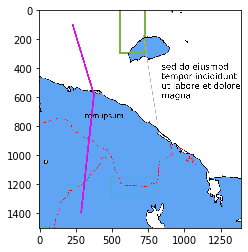

In [6]:
fftest =  glob("./test/*.png")
img = cv.imread(fftest[0])
plt.imshow(img)
plt.show()



In [0]:
### set parameters here or have yml file 

In [8]:
### define your models here and replace with random generation number 
##load your trained model file (h5/pb/pickle or any other format)
##sample keras loading model: 
##tf.keras.models.load_model(
##    "./trainedmodel_XEpochs_YBatch.h5", custom_objects=None, compile=True)
## see: https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model


## we defined a randome generator as our model which is NOT A SOLUTION
def randModel(img):
  llcrnrlon = np.random.uniform(testDF.llcrnrlon.min(),testDF.llcrnrlon.max())
  llcrnrlat = np.random.uniform(testDF.llcrnrlat.min(),testDF.llcrnrlat.max())
  urcrnrlon = np.random.uniform(testDF.urcrnrlon.min(),testDF.urcrnrlon.max())
  urcrnrlat = np.random.uniform(testDF.urcrnrlat.min(),testDF.urcrnrlat.max())
  return (llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat)



startTestTime = time.time()
##Write test here
##Load your pretrained model here
#resTestDF = testDF.copy()
testDF[["llcrnrlonPred","llcrnrlatPred","urcrnrlonPred","urcrnrlatPred"]] = testDF.apply(lambda x: pd.Series(randModel(x["id"])), axis=1)
print(testDF.head())
print("Test took ", time.time()-startTestTime)


mean_squared_error(testDF[["llcrnrlonPred","llcrnrlatPred","urcrnrlonPred","urcrnrlatPred"]],testDF[["llcrnrlonPred","llcrnrlatPred","urcrnrlonPred","urcrnrlatPred"]])


           id   llcrnrlon  ...  urcrnrlonPred  urcrnrlatPred
0  28ec8dc73f   -6.270972  ...     111.553888     -14.569294
1  849479b291  -76.394914  ...     -98.513109      38.322301
2  8497a44e5a  -74.311266  ...     156.958656     -31.276133
3  b315d330a4  -80.048037  ...      37.252252      38.435658
4  ed6bbb627b  106.700661  ...     145.445853     -11.253472

[5 rows x 9 columns]
Test took  7.586984395980835


0.0

In [9]:
##print results and save submission file
RMSE = mean_squared_error(testDF[["llcrnrlon","llcrnrlat","urcrnrlon","urcrnrlat"]],testDF[["llcrnrlonPred","llcrnrlatPred","urcrnrlonPred","urcrnrlatPred"]])
print(RMSE)
testDF[["id","llcrnrlonPred","llcrnrlatPred","urcrnrlonPred","urcrnrlatPred"]].to_csv("submission.csv")

11477.379994780018


In [10]:
!ls -ltr . 
!head submission.csv

total 2123128
drwxr-xr-x 1 root root       4096 Mar  3 18:11 sample_data
-rw-r--r-- 1 root root     927315 Mar  5 17:46 test.csv
-rw-r--r-- 1 root root 2171879309 Mar  5 17:46 testImages.zip
drwxr-xr-x 2 root root     352256 Mar  5 17:47 test
-rw-r--r-- 1 root root     913387 Mar  5 17:52 submission.csv
,id,llcrnrlonPred,llcrnrlatPred,urcrnrlonPred,urcrnrlatPred
0,28ec8dc73f,-150.8805189213074,1.4910084681681468,111.55388789708897,-14.56929389082839
1,849479b291,91.840100973403,-5.652888919270431,-98.5131093460062,38.32230133124555
2,8497a44e5a,4.986982122219217,-19.1018095340567,156.95865626741315,-31.276133441394617
3,b315d330a4,-68.83225791339302,10.230584400583183,37.25225236679597,38.43565811016823
4,ed6bbb627b,116.48600202579749,-6.471199691842465,145.44585261183138,-11.25347169946751
5,11655d4f97,-63.663075373844094,-57.6434363104416,6.445244920072156,-41.66402104334833
6,b641cd0e50,-47.557913332783045,-22.79449756384968,-63.14454109571943,15.944932032043077
7,cda14183f5,42.0476